In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
form_ = "mc"
mip_="mip"

file1=f"C:/Users/mateu/Downloads/Mestrado-main/Mestrado-main/CLSP_PY/MODELO_MC/MODELO_MC_ORIGINAL/RESULTADOS/clsr_{form_}_{mip_}.txt"

df1 = pd.DataFrame()
df1 = pd.read_csv(file1,header=None,sep=';')

table1 = pd.DataFrame()
table1 = pd.concat([table1, df1], ignore_index=True)
table1.columns = ['instance','lb','ub','gap','time','nodes','opt']


mip_mc1 = table1

In [3]:
table1

,instance,lb,ub,gap,time,nodes,opt
0,c52_1.txt,9746.2,9681.280,0.007,3600.003,272370.0,0
1,c52_2.txt,10120.2,10013.732,0.011,3600.002,296724.0,0
2,c52_3.txt,9334.0,9334.000,0.000,1348.570,92679.0,1
3,c52_4.txt,10332.0,10249.149,0.008,3600.002,514871.0,0
4,c52_5.txt,11124.5,11058.775,0.006,3600.002,443547.0,0
...,...,...,...,...,...,...,...
103,c52_104.txt,72897.5,71893.414,0.014,3600.009,246523.0,0
104,c52_105.txt,70930.4,70061.739,0.012,3600.003,188713.0,0
105,c52_106.txt,83134.4,82095.444,0.012,3600.009,371296.0,0
106,c52_107.txt,63700.8,62975.823,0.011,3600.003,145749.0,0


In [4]:
def tabela_resultados(url_file_heuristic, url_file_mip):
    df = pd.read_csv(url_file_heuristic,header=None, sep=';')
    df1 = pd.read_csv(url_file_mip,header=None, sep=';')

    table = pd.DataFrame()
    table = pd.concat([table, df], ignore_index=True)
    table.columns = ['instance','rf','trf','opt','topt','time']

    table['grupo'] = 'grupo' 

    rf_opt = table   

    table1 = pd.DataFrame()
    table1 = pd.concat([table1, df1], ignore_index=True)
    table1.columns = ['instance','lb','ub','gap','time','nodes','opt']
    mip = table1


    table = table.merge(table1[['instance','ub',	'time',	'opt']], how= 'inner', on = 'instance')

    table['gap_rf'] = 100*(table['rf'] - table['ub'])/table['ub']
    table['gap_fop'] = 100*(table['opt'] - table['ub'])/table['ub']
    
    table_result = pd.DataFrame()

    contador  = 1
    set_cont = 1
    while True:
        set_ ='set0{}'.format(str(set_cont))
        tab = pd.DataFrame()
        for i in range(contador, contador+12):
            t = rf_opt.loc[rf_opt['instance'] == f'c52_{i}.txt']
            tab = pd.concat([tab,t])
            table.loc[table[table['instance'] == f'c52_{i}.txt'].index,'grupo'] = set_
            

        tab = pd.DataFrame({
            'instance':f'{set_}',
            'rf':tab['rf'].mean(),
            'trf':tab['trf'].mean(),
            'opt':tab['opt'].mean(),
            'topt':tab['topt'].mean(),
            'time':tab['time'].mean(),
            'FO_MIP':tab['FO_MIP'].mean(),
            'Time_MIP':tab['Time_MIP'].mean(),
            'gap_rf':tab['gap_rf'].mean(),
            'gap_fop':tab['gap_fop'].mean(),
            },index=[f'{form_}']
        )

        if table_result.shape[0] == 0:
            table_result = tab.copy(deep=True)
        else:
            table_result = pd.concat([table_result,tab])

        contador = contador + 12
        set_cont = set_cont + 1

        if set_cont > 9 :
            break

    return table_result

In [52]:
form_ = "MC"

file=f"C:/Users/mateu/Downloads/Mestrado-main/Mestrado-main/CLSP_PY/MODELO_{form_}/MODELO_{form_}_RF_OPT/RESULTADOS/clsr_{form_}_relax_and_opt_table.txt"

df = pd.DataFrame()
df = pd.read_csv(file,header=None,sep=';')

table = pd.DataFrame()
table = pd.concat([table, df], ignore_index=True)
table.columns = ['instance','rf','trf','opt','topt','time']

table['grupo'] = 'grupo' 

rf_opt_mc = table
rf_opt_mc


,instance,rf,trf,opt,topt,time,grupo
0,c52_1.txt,9796.8,6.737,9776.4,3.264,10.001,grupo
1,c52_2.txt,10204.6,8.280,10159.2,3.964,12.244,grupo
2,c52_3.txt,9413.8,6.616,9381.8,2.871,9.487,grupo
3,c52_4.txt,10400.2,8.298,10381.4,4.008,12.306,grupo
4,c52_5.txt,11243.5,6.712,11172.0,3.464,10.176,grupo
...,...,...,...,...,...,...,...
103,c52_104.txt,72897.5,14.677,72897.5,3.686,18.363,grupo
104,c52_105.txt,71415.8,12.770,71363.0,3.725,16.495,grupo
105,c52_106.txt,84083.0,16.677,83903.2,4.262,20.939,grupo
106,c52_107.txt,64242.8,12.129,64197.0,3.419,15.548,grupo


In [53]:
table['FO_MIP'] = table1['ub'].copy(deep=True)
table['Time_MIP'] = table1['time'].copy(deep=True)
table['Resolvida'] = table1['opt'].copy(deep=True)

In [54]:
table['gap_rf'] = 100*(table['rf'] - table['FO_MIP'])/table['FO_MIP']
table['gap_fop'] = 100*(table['opt'] - table['FO_MIP'])/table['FO_MIP']

In [55]:
table.head()

,instance,rf,trf,opt,topt,time,grupo,FO_MIP,Time_MIP,Resolvida,gap_rf,gap_fop
0,c52_1.txt,9796.8,6.737,9776.4,3.264,10.001,grupo,9681.280,3600.003,0,1.193231,0.982515
1,c52_2.txt,10204.6,8.280,10159.2,3.964,12.244,grupo,10013.732,3600.002,0,1.906063,1.452685
2,c52_3.txt,9413.8,6.616,9381.8,2.871,9.487,grupo,9334.000,1348.570,1,0.854939,0.512106
3,c52_4.txt,10400.2,8.298,10381.4,4.008,12.306,grupo,10249.149,3600.002,0,1.473791,1.290361
4,c52_5.txt,11243.5,6.712,11172.0,3.464,10.176,grupo,11058.775,3600.002,0,1.670393,1.023848


In [56]:
set_ = 'set01'

tab = pd.DataFrame()
for i in range(1,13):
    t = rf_opt_mc.loc[rf_opt_mc['instance'] == f'c52_{i}.txt']
    tab = pd.concat([tab,t])
    table.loc[table[table['instance'] == f'c52_{i}.txt'].index,'grupo'] = set_

tab = pd.DataFrame({
    'instance':f'{set_}',
    'rf':tab['rf'].mean(),
    'trf':tab['trf'].mean(),
    'opt':tab['opt'].mean(),
    'topt':tab['topt'].mean(),
    'time':tab['time'].mean(),
    'FO_MIP':tab['FO_MIP'].mean(),
    'Time_MIP':tab['Time_MIP'].mean(),
    'gap_rf':tab['gap_rf'].mean(),
    'gap_fop':tab['gap_fop'].mean(),
    },index=[f'{form_}']
)

set01_rf_opt_mc = tab
set01_rf_opt_mc

,instance,rf,trf,opt,topt,time,FO_MIP,Time_MIP,gap_rf,gap_fop
MC,set01,10718.816667,6.76875,10678.45,3.29025,10.05875,10569.857167,2946.667,1.394234,1.016004


In [57]:
set_ = 'set02'

tab = pd.DataFrame()
for i in range(13,25):
    t = rf_opt_mc.loc[rf_opt_mc['instance'] == f'c52_{i}.txt']
    tab = pd.concat([tab,t])
    table.loc[table[table['instance'] == f'c52_{i}.txt'].index,'grupo'] = set_

tab = pd.DataFrame({
    'instance':f'{set_}',
    'rf':tab['rf'].mean(),
    'trf':tab['trf'].mean(),
    'opt':tab['opt'].mean(),
    'topt':tab['topt'].mean(),
    'time':tab['time'].mean(),
    'FO_MIP':tab['FO_MIP'].mean(),
    'Time_MIP':tab['Time_MIP'].mean(),
    'gap_rf':tab['gap_rf'].mean(),
    'gap_fop':tab['gap_fop'].mean(),
    },index=[f'{form_}']
)

set02_rf_opt_mc = tab
set02_rf_opt_mc

,instance,rf,trf,opt,topt,time,FO_MIP,Time_MIP,gap_rf,gap_fop
MC,set02,17377.058333,8.123917,17353.1,3.853,11.976833,16958.014333,3538.699083,2.503151,2.357292


In [58]:
set_ = 'set03'

tab = pd.DataFrame()
for i in range(25,37):
    t = rf_opt_mc.loc[rf_opt_mc['instance'] == f'c52_{i}.txt']
    tab = pd.concat([tab,t])
    table.loc[table[table['instance'] == f'c52_{i}.txt'].index,'grupo'] = set_

tab = pd.DataFrame({
    'instance':f'{set_}',
    'rf':tab['rf'].mean(),
    'trf':tab['trf'].mean(),
    'opt':tab['opt'].mean(),
    'topt':tab['topt'].mean(),
    'time':tab['time'].mean(),
    'FO_MIP':tab['FO_MIP'].mean(),
    'Time_MIP':tab['Time_MIP'].mean(),
    'gap_rf':tab['gap_rf'].mean(),
    'gap_fop':tab['gap_fop'].mean(),
    },index=[f'{form_}']
)

set03_rf_opt_mc = tab
set03_rf_opt_mc

,instance,rf,trf,opt,topt,time,FO_MIP,Time_MIP,gap_rf,gap_fop
MC,set03,48375.308333,9.822583,48312.366667,4.229,14.051667,47315.932417,3600.002833,2.20445,2.07979


In [59]:
set_ = 'set04'

tab = pd.DataFrame()
for i in range(37,49):
    t = rf_opt_mc.loc[rf_opt_mc['instance'] == f'c52_{i}.txt']
    tab = pd.concat([tab,t])
    table.loc[table[table['instance'] == f'c52_{i}.txt'].index,'grupo'] = set_

tab = pd.DataFrame({
    'instance':f'{set_}',
    'rf':tab['rf'].mean(),
    'trf':tab['trf'].mean(),
    'opt':tab['opt'].mean(),
    'topt':tab['topt'].mean(),
    'time':tab['time'].mean(),
    'FO_MIP':tab['FO_MIP'].mean(),
    'Time_MIP':tab['Time_MIP'].mean(),
    'gap_rf':tab['gap_rf'].mean(),
    'gap_fop':tab['gap_fop'].mean(),
    },index=[f'{form_}']
)

set04_rf_opt_mc = tab
set04_rf_opt_mc

,instance,rf,trf,opt,topt,time,FO_MIP,Time_MIP,gap_rf,gap_fop
MC,set04,15032.0,6.987833,14963.783333,3.376167,10.363833,14854.234167,1620.532,1.20822,0.723941


In [60]:
set_ = 'set05'

tab = pd.DataFrame()
for i in range(49,61):
    t = rf_opt_mc.loc[rf_opt_mc['instance'] == f'c52_{i}.txt']
    tab = pd.concat([tab,t])
    table.loc[table[table['instance'] == f'c52_{i}.txt'].index,'grupo'] = set_

tab = pd.DataFrame({
    'instance':f'{set_}',
    'rf':tab['rf'].mean(),
    'trf':tab['trf'].mean(),
    'opt':tab['opt'].mean(),
    'topt':tab['topt'].mean(),
    'time':tab['time'].mean(),
    'FO_MIP':tab['FO_MIP'].mean(),
    'Time_MIP':tab['Time_MIP'].mean(),
    'gap_rf':tab['gap_rf'].mean(),
    'gap_fop':tab['gap_fop'].mean(),
    },index=[f'{form_}']
)

set05_rf_opt_mc = tab
set05_rf_opt_mc

,instance,rf,trf,opt,topt,time,FO_MIP,Time_MIP,gap_rf,gap_fop
MC,set05,22049.716667,9.379833,21968.925,3.94725,13.326917,21493.7045,3586.342083,2.601426,2.226376


In [61]:
set_ = 'set06'

tab = pd.DataFrame()
for i in range(61,73):
    t = rf_opt_mc.loc[rf_opt_mc['instance'] == f'c52_{i}.txt']
    tab = pd.concat([tab,t])
    table.loc[table[table['instance'] == f'c52_{i}.txt'].index,'grupo'] = set_

tab = pd.DataFrame({
    'instance':f'{set_}',
    'rf':tab['rf'].mean(),
    'trf':tab['trf'].mean(),
    'opt':tab['opt'].mean(),
    'topt':tab['topt'].mean(),
    'time':tab['time'].mean(),
    'FO_MIP':tab['FO_MIP'].mean(),
    'Time_MIP':tab['Time_MIP'].mean(),
    'gap_rf':tab['gap_rf'].mean(),
    'gap_fop':tab['gap_fop'].mean(),
    },index=[f'{form_}']
)
set06_rf_opt_mc = tab
set06_rf_opt_mc

,instance,rf,trf,opt,topt,time,FO_MIP,Time_MIP,gap_rf,gap_fop
MC,set06,53233.225,12.2215,53137.708333,4.363167,16.584583,52266.71475,3600.002583,1.880172,1.711411


In [62]:
set_ = 'set07'

tab = pd.DataFrame()
for i in range(73,85):
    t = rf_opt_mc.loc[rf_opt_mc['instance'] == f'c52_{i}.txt']
    tab = pd.concat([tab,t])
    table.loc[table[table['instance'] == f'c52_{i}.txt'].index,'grupo'] = set_

tab = pd.DataFrame({
    'instance':f'{set_}',
    'rf':tab['rf'].mean(),
    'trf':tab['trf'].mean(),
    'opt':tab['opt'].mean(),
    'topt':tab['topt'].mean(),
    'time':tab['time'].mean(),
    'FO_MIP':tab['FO_MIP'].mean(),
    'Time_MIP':tab['Time_MIP'].mean(),
    'gap_rf':tab['gap_rf'].mean(),
    'gap_fop':tab['gap_fop'].mean(),
    },index=[f'{form_}']
)

set07_rf_opt_mc = tab
set07_rf_opt_mc

,instance,rf,trf,opt,topt,time,FO_MIP,Time_MIP,gap_rf,gap_fop
MC,set07,33013.075,5.87125,28002.125,2.759083,8.6305,27721.9395,50.520667,17.100748,0.970994


In [63]:
set_ = 'set08'

tab = pd.DataFrame()
for i in range(85,97):
    t = rf_opt_mc.loc[rf_opt_mc['instance'] == f'c52_{i}.txt']
    tab = pd.concat([tab,t])
    table.loc[table[table['instance'] == f'c52_{i}.txt'].index,'grupo'] = set_

tab = pd.DataFrame({
    'instance':f'{set_}',
    'rf':tab['rf'].mean(),
    'trf':tab['trf'].mean(),
    'opt':tab['opt'].mean(),
    'topt':tab['topt'].mean(),
    'time':tab['time'].mean(),
    'FO_MIP':tab['FO_MIP'].mean(),
    'Time_MIP':tab['Time_MIP'].mean(),
    'gap_rf':tab['gap_rf'].mean(),
    'gap_fop':tab['gap_fop'].mean(),
    },index=[f'{form_}']
)

set08_rf_opt_mc = tab
set08_rf_opt_mc

,instance,rf,trf,opt,topt,time,FO_MIP,Time_MIP,gap_rf,gap_fop
MC,set08,42352.816667,7.577333,37289.458333,3.28625,10.8635,36876.578917,799.3065,13.860268,1.043255


In [64]:
set_ = 'set09'

tab = pd.DataFrame()
for i in range(97,109):
    t = rf_opt_mc.loc[rf_opt_mc['instance'] == f'c52_{i}.txt']
    tab = pd.concat([tab,t])
    table.loc[table[table['instance'] == f'c52_{i}.txt'].index,'grupo'] = set_

tab = pd.DataFrame({
    'instance':f'{set_}',
    'rf':tab['rf'].mean(),
    'trf':tab['trf'].mean(),
    'opt':tab['opt'].mean(),
    'topt':tab['topt'].mean(),
    'time':tab['time'].mean(),
    'FO_MIP':tab['FO_MIP'].mean(),
    'Time_MIP':tab['Time_MIP'].mean(),
    'gap_rf':tab['gap_rf'].mean(),
    'gap_fop':tab['gap_fop'].mean(),
    },index=[f'{form_}']
)

set09_rf_opt_mc = tab
set09_rf_opt_mc

,instance,rf,trf,opt,topt,time,FO_MIP,Time_MIP,gap_rf,gap_fop
MC,set09,73353.191667,14.183417,73182.041667,3.841167,18.024583,72024.632083,3600.003917,1.834172,1.595195


In [65]:
res_rf_opt_mc = pd.DataFrame()
res_rf_opt_mc = pd.concat([res_rf_opt_mc,set01_rf_opt_mc], ignore_index= True)
res_rf_opt_mc = pd.concat([res_rf_opt_mc,set02_rf_opt_mc], ignore_index= True)
res_rf_opt_mc = pd.concat([res_rf_opt_mc,set03_rf_opt_mc], ignore_index= True)
res_rf_opt_mc = pd.concat([res_rf_opt_mc,set04_rf_opt_mc], ignore_index= True)
res_rf_opt_mc = pd.concat([res_rf_opt_mc,set05_rf_opt_mc], ignore_index= True)
res_rf_opt_mc = pd.concat([res_rf_opt_mc,set06_rf_opt_mc], ignore_index= True)
res_rf_opt_mc = pd.concat([res_rf_opt_mc,set07_rf_opt_mc], ignore_index= True)
res_rf_opt_mc = pd.concat([res_rf_opt_mc,set08_rf_opt_mc], ignore_index= True)
res_rf_opt_mc = pd.concat([res_rf_opt_mc,set09_rf_opt_mc], ignore_index= True)
res_rf_opt_mc

,instance,rf,trf,opt,topt,time,FO_MIP,Time_MIP,gap_rf,gap_fop
0,set01,10718.816667,6.768750,10678.450000,3.290250,10.058750,10569.857167,2946.667000,1.394234,1.016004
1,set02,17377.058333,8.123917,17353.100000,3.853000,11.976833,16958.014333,3538.699083,2.503151,2.357292
2,set03,48375.308333,9.822583,48312.366667,4.229000,14.051667,47315.932417,3600.002833,2.204450,2.079790
3,set04,15032.000000,6.987833,14963.783333,3.376167,10.363833,14854.234167,1620.532000,1.208220,0.723941
4,set05,22049.716667,9.379833,21968.925000,3.947250,13.326917,21493.704500,3586.342083,2.601426,2.226376
5,set06,53233.225000,12.221500,53137.708333,4.363167,16.584583,52266.714750,3600.002583,1.880172,1.711411
6,set07,33013.075000,5.871250,28002.125000,2.759083,8.630500,27721.939500,50.520667,17.100748,0.970994
7,set08,42352.816667,7.577333,37289.458333,3.286250,10.863500,36876.578917,799.306500,13.860268,1.043255
8,set09,73353.191667,14.183417,73182.041667,3.841167,18.024583,72024.632083,3600.003917,1.834172,1.595195


In [66]:
tab = pd.DataFrame({
    'instance':f'res_rf_opt_mc',
    'rf':res_rf_opt_mc['rf'].mean(),
    'trf':res_rf_opt_mc['trf'].mean(),
    'opt':res_rf_opt_mc['opt'].mean(),
    'topt':res_rf_opt_mc['topt'].mean(),
    'time':res_rf_opt_mc['time'].mean(),
    'FO_MIP' : res_rf_opt_mc['FO_MIP'].mean(),
    'Time_MIP' : res_rf_opt_mc['Time_MIP'].mean(),
    'gap_rf' : res_rf_opt_mc['gap_rf'].mean(),
    'gap_fop' : res_rf_opt_mc['gap_fop'].mean(),    

    },index=[f'res_rf_opt_mc']
)

res_rf_opt_mc = pd.concat([res_rf_opt_mc, tab], ignore_index=True)
res_rf_opt_mc

print(res_rf_opt_mc[['instance','rf','trf','opt','topt','time','FO_MIP','Time_MIP','gap_rf','gap_fop']].to_latex(index=False,float_format="%.2f"))

\begin{tabular}{lrrrrrrrrr}
\toprule
instance & rf & trf & opt & topt & time & FO_MIP & Time_MIP & gap_rf & gap_fop \\
\midrule
set01 & 10718.82 & 6.77 & 10678.45 & 3.29 & 10.06 & 10569.86 & 2946.67 & 1.39 & 1.02 \\
set02 & 17377.06 & 8.12 & 17353.10 & 3.85 & 11.98 & 16958.01 & 3538.70 & 2.50 & 2.36 \\
set03 & 48375.31 & 9.82 & 48312.37 & 4.23 & 14.05 & 47315.93 & 3600.00 & 2.20 & 2.08 \\
set04 & 15032.00 & 6.99 & 14963.78 & 3.38 & 10.36 & 14854.23 & 1620.53 & 1.21 & 0.72 \\
set05 & 22049.72 & 9.38 & 21968.93 & 3.95 & 13.33 & 21493.70 & 3586.34 & 2.60 & 2.23 \\
set06 & 53233.23 & 12.22 & 53137.71 & 4.36 & 16.58 & 52266.71 & 3600.00 & 1.88 & 1.71 \\
set07 & 33013.08 & 5.87 & 28002.13 & 2.76 & 8.63 & 27721.94 & 50.52 & 17.10 & 0.97 \\
set08 & 42352.82 & 7.58 & 37289.46 & 3.29 & 10.86 & 36876.58 & 799.31 & 13.86 & 1.04 \\
set09 & 73353.19 & 14.18 & 73182.04 & 3.84 & 18.02 & 72024.63 & 3600.00 & 1.83 & 1.60 \\
res_rf_opt_mc & 35056.13 & 8.99 & 33876.44 & 3.66 & 12.65 & 33342.40 & 2593.56 &

In [67]:
table

,instance,rf,trf,opt,topt,time,grupo,FO_MIP,Time_MIP,Resolvida,gap_rf,gap_fop
0,c52_1.txt,9796.8,6.737,9776.4,3.264,10.001,set01,9681.280,3600.003,0,1.193231,0.982515
1,c52_2.txt,10204.6,8.280,10159.2,3.964,12.244,set01,10013.732,3600.002,0,1.906063,1.452685
2,c52_3.txt,9413.8,6.616,9381.8,2.871,9.487,set01,9334.000,1348.570,1,0.854939,0.512106
3,c52_4.txt,10400.2,8.298,10381.4,4.008,12.306,set01,10249.149,3600.002,0,1.473791,1.290361
4,c52_5.txt,11243.5,6.712,11172.0,3.464,10.176,set01,11058.775,3600.002,0,1.670393,1.023848
...,...,...,...,...,...,...,...,...,...,...,...,...
103,c52_104.txt,72897.5,14.677,72897.5,3.686,18.363,set09,71893.414,3600.009,0,1.396631,1.396631
104,c52_105.txt,71415.8,12.770,71363.0,3.725,16.495,set09,70061.739,3600.003,0,1.932668,1.857306
105,c52_106.txt,84083.0,16.677,83903.2,4.262,20.939,set09,82095.444,3600.009,0,2.421031,2.202017
106,c52_107.txt,64242.8,12.129,64197.0,3.419,15.548,set09,62975.823,3600.003,0,2.011847,1.939120


Text(0.5, 0, 'Grupo')

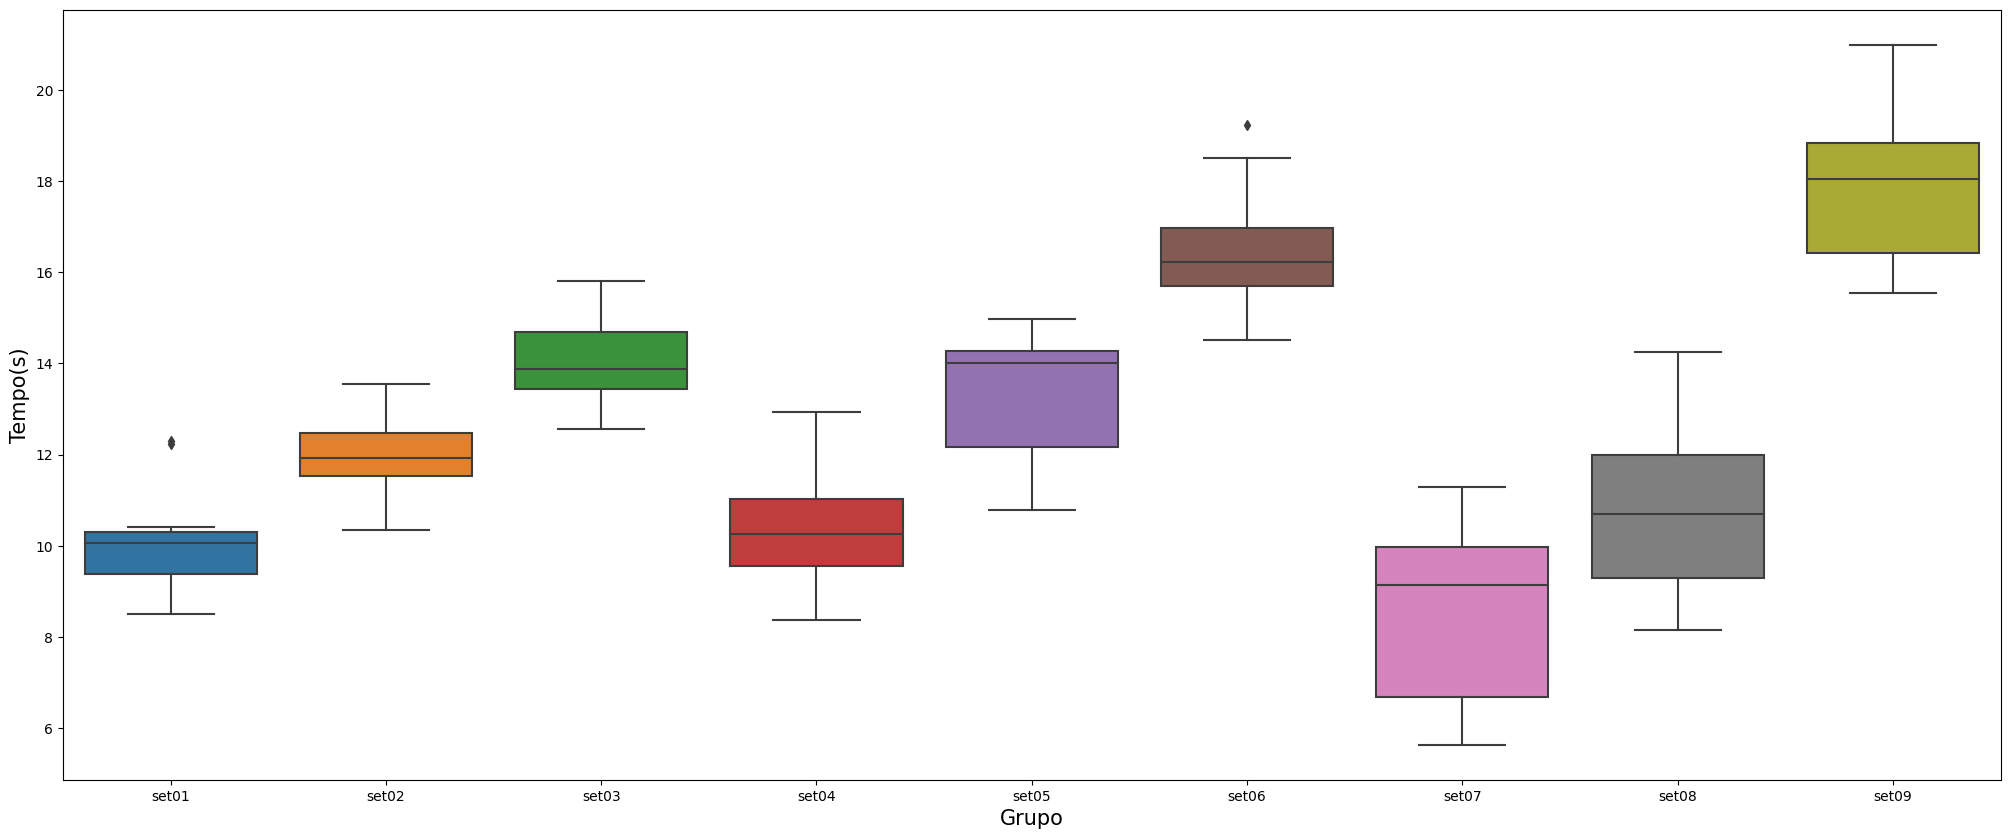

In [71]:
plt.figure(figsize=(25,10))
sns.boxplot(x=table['grupo'].astype('str'), y= table['time'], order= sorted(list(table['grupo'].unique().astype('str'))))
plt.ylabel("Tempo(s)", fontsize = 15)
plt.xlabel("Grupo", fontsize = 15)

In [94]:
form_ = "sp"
mip_="mip"

file=f"C:/Users/mateu/Downloads/Mestrado-main/Mestrado-main/CLSP_PY/MODELO_SP/MODELO_SP_ORIGINAL/RESULTADOS/clsr_{form_}_{mip_}.txt"

df1 = pd.DataFrame()
df1 = pd.read_csv(file,header=None,sep=';')

table1 = pd.DataFrame()
table1 = pd.concat([table1, df1], ignore_index=True)
table1.columns = ['instance','lb','ub','gap','time','nodes','opt']

#resume = pd.DataFrame({
#    'instance':f'resume',
#    'lb':table['lb'].mean(),
#    'ub':table['ub'].mean(),
#    #'gap':table.loc[table['opt'] == 0,'gap'].mean(),
#    #'time':table.loc[table['opt'] == 1,'time'].mean(),
#    'gap':table['gap'].mean(),
#    'time':table['time'].mean(),
#    'nodes':table['nodes'].mean(),
#    'opt':table['opt'].sum(),
#    },index=["resume"]
#)

#table = pd.concat([table, resume], ignore_index=True)

mip_sp1 = table1
#mip_sp


In [95]:
table1.head(3)

,instance,lb,ub,gap,time,nodes,opt
0,c52_1.txt,9751.532,9332.928,0.043,3600.002,538542.0,0
1,c52_2.txt,10151.194,9515.082,0.063,3600.002,955909.0,0
2,c52_3.txt,9347.798,9164.475,0.020,3600.002,634300.0,0


In [96]:
form_ = "SP"

file=f"C:/Users/mateu/Downloads/Mestrado-main/Mestrado-main/CLSP_PY/MODELO_{form_}/MODELO_{form_}_RF_OPT/RESULTADOS/clsr_{form_}_relax_and_opt_table.txt"

df = pd.DataFrame()
df = pd.read_csv(file,header=None,sep=';')

table = pd.DataFrame()
table = pd.concat([table, df], ignore_index=True)
table.columns = ['instance','rf','trf','opt','topt','time']


rf_opt_sp = table
rf_opt_sp


,instance,rf,trf,opt,topt,time
0,c52_1.txt,9796.8,4.276,9776.4,2.764,7.040
1,c52_2.txt,10204.6,5.610,10159.2,3.312,8.922
2,c52_3.txt,9413.8,3.908,9381.8,2.625,6.533
3,c52_4.txt,10400.2,5.415,10381.4,3.638,9.053
4,c52_5.txt,11243.5,4.512,11172.0,3.093,7.605
...,...,...,...,...,...,...
103,c52_104.txt,72897.5,20.317,72897.5,4.135,24.452
104,c52_105.txt,71415.8,14.641,71363.0,3.877,18.518
105,c52_106.txt,84083.0,24.909,83903.2,5.707,30.616
106,c52_107.txt,64242.8,11.855,64197.0,3.125,14.980


In [97]:
table['FO_MIP'] = table1['ub'].copy(deep=True)
table['Time_MIP'] = table1['time'].copy(deep=True)
table['Resolvida'] = table1['opt'].copy(deep=True)
table['gap_rf'] = 100*(table['rf'] - table['FO_MIP'])/table['FO_MIP']
table['gap_fop'] = 100*(table['opt'] - table['FO_MIP'])/table['FO_MIP']

In [98]:
table.head(4)

,instance,rf,trf,opt,topt,time,FO_MIP,Time_MIP,Resolvida,gap_rf,gap_fop
0,c52_1.txt,9796.8,4.276,9776.4,2.764,7.040,9332.928,3600.002,0,4.970273,4.751692
1,c52_2.txt,10204.6,5.610,10159.2,3.312,8.922,9515.082,3600.002,0,7.246580,6.769442
2,c52_3.txt,9413.8,3.908,9381.8,2.625,6.533,9164.475,3600.002,0,2.720560,2.371385
3,c52_4.txt,10400.2,5.415,10381.4,3.638,9.053,9814.822,3600.001,0,5.964224,5.772677


In [99]:
set_ = 'set01'

tab = pd.DataFrame()
for i in range(1,13):
    t = rf_opt_sp.loc[rf_opt_sp['instance'] == f'c52_{i}.txt']
    tab = pd.concat([tab,t])
    table.loc[table[table['instance'] == f'c52_{i}.txt'].index,'grupo'] = set_

tab = pd.DataFrame({
    'instance':f'{set_}',
    'rf':tab['rf'].mean(),
    'trf':tab['trf'].mean(),
    'opt':tab['opt'].mean(),
    'topt':tab['topt'].mean(),
    'time':tab['time'].mean(),
    'FO_MIP':tab['FO_MIP'].mean(),
    'Time_MIP':tab['Time_MIP'].mean(),
    'gap_rf':tab['gap_rf'].mean(),
    'gap_fop':tab['gap_fop'].mean(),
    },index=[f'{form_}']
)

set01_rf_opt_sp = tab
set01_rf_opt_sp

,instance,rf,trf,opt,topt,time,FO_MIP,Time_MIP,gap_rf,gap_fop
SP,set01,10718.816667,4.126333,10678.45,2.865083,6.991583,10262.9215,3600.001917,4.451583,4.061636


In [100]:
set_ = 'set02'

tab = pd.DataFrame()
for i in range(13,25):
    t = rf_opt_sp.loc[rf_opt_sp['instance'] == f'c52_{i}.txt']
    tab = pd.concat([tab,t])
    table.loc[table[table['instance'] == f'c52_{i}.txt'].index,'grupo'] = set_

tab = pd.DataFrame({
    'instance':f'{set_}',
    'rf':tab['rf'].mean(),
    'trf':tab['trf'].mean(),
    'opt':tab['opt'].mean(),
    'topt':tab['topt'].mean(),
    'time':tab['time'].mean(),
    'FO_MIP':tab['FO_MIP'].mean(),
    'Time_MIP':tab['Time_MIP'].mean(),
    'gap_rf':tab['gap_rf'].mean(),
    'gap_fop':tab['gap_fop'].mean(),
    },index=[f'{form_}']
)

set02_rf_opt_sp = tab
set02_rf_opt_sp

,instance,rf,trf,opt,topt,time,FO_MIP,Time_MIP,gap_rf,gap_fop
SP,set02,17377.058333,5.895333,17353.099917,3.50275,9.398167,16693.904917,3600.01325,4.135361,3.987078


In [101]:
set_ = 'set03'

tab = pd.DataFrame()
for i in range(25,37):
    t = rf_opt_sp.loc[rf_opt_sp['instance'] == f'c52_{i}.txt']
    tab = pd.concat([tab,t])
    table.loc[table[table['instance'] == f'c52_{i}.txt'].index,'grupo'] = set_

tab = pd.DataFrame({
    'instance':f'{set_}',
    'rf':tab['rf'].mean(),
    'trf':tab['trf'].mean(),
    'opt':tab['opt'].mean(),
    'topt':tab['topt'].mean(),
    'time':tab['time'].mean(),
    'FO_MIP':tab['FO_MIP'].mean(),
    'Time_MIP':tab['Time_MIP'].mean(),
    'gap_rf':tab['gap_rf'].mean(),
    'gap_fop':tab['gap_fop'].mean(),
    },index=[f'{form_}']
)

set03_rf_opt_sp = tab
set03_rf_opt_sp

,instance,rf,trf,opt,topt,time,FO_MIP,Time_MIP,gap_rf,gap_fop
SP,set03,48375.308333,9.218417,48312.366667,4.55025,13.768833,46836.726833,3600.004333,3.287543,3.161392


In [102]:
set_ = 'set04'

tab = pd.DataFrame()
for i in range(37,49):
    t = rf_opt_sp.loc[rf_opt_sp['instance'] == f'c52_{i}.txt']
    tab = pd.concat([tab,t])
    table.loc[table[table['instance'] == f'c52_{i}.txt'].index,'grupo'] = set_

tab = pd.DataFrame({
    'instance':f'{set_}',
    'rf':tab['rf'].mean(),
    'trf':tab['trf'].mean(),
    'opt':tab['opt'].mean(),
    'topt':tab['topt'].mean(),
    'time':tab['time'].mean(),
    'FO_MIP':tab['FO_MIP'].mean(),
    'Time_MIP':tab['Time_MIP'].mean(),
    'gap_rf':tab['gap_rf'].mean(),
    'gap_fop':tab['gap_fop'].mean(),
    },index=[f'{form_}']
)

set04_rf_opt_sp = tab
set04_rf_opt_sp

,instance,rf,trf,opt,topt,time,FO_MIP,Time_MIP,gap_rf,gap_fop
SP,set04,15032.0,4.950583,14963.783333,2.83175,7.782333,14436.865833,3600.003917,4.137327,3.636006


In [103]:
set_ = 'set05'

tab = pd.DataFrame()
for i in range(49,61):
    t = rf_opt_sp.loc[rf_opt_sp['instance'] == f'c52_{i}.txt']
    tab = pd.concat([tab,t])
    table.loc[table[table['instance'] == f'c52_{i}.txt'].index,'grupo'] = set_

tab = pd.DataFrame({
    'instance':f'{set_}',
    'rf':tab['rf'].mean(),
    'trf':tab['trf'].mean(),
    'opt':tab['opt'].mean(),
    'topt':tab['topt'].mean(),
    'time':tab['time'].mean(),
    'FO_MIP':tab['FO_MIP'].mean(),
    'Time_MIP':tab['Time_MIP'].mean(),
    'gap_rf':tab['gap_rf'].mean(),
    'gap_fop':tab['gap_fop'].mean(),
    },index=[f'{form_}']
)

set05_rf_opt_sp = tab
set05_rf_opt_sp

,instance,rf,trf,opt,topt,time,FO_MIP,Time_MIP,gap_rf,gap_fop
SP,set05,22049.716667,7.609833,21968.925,3.473333,11.083417,21104.262833,3600.002167,4.48217,4.099578


In [104]:
set_ = 'set06'

tab = pd.DataFrame()
for i in range(61,73):
    t = rf_opt_sp.loc[rf_opt_sp['instance'] == f'c52_{i}.txt']
    tab = pd.concat([tab,t])
    table.loc[table[table['instance'] == f'c52_{i}.txt'].index,'grupo'] = set_

tab = pd.DataFrame({
    'instance':f'{set_}',
    'rf':tab['rf'].mean(),
    'trf':tab['trf'].mean(),
    'opt':tab['opt'].mean(),
    'topt':tab['topt'].mean(),
    'time':tab['time'].mean(),
    'FO_MIP':tab['FO_MIP'].mean(),
    'Time_MIP':tab['Time_MIP'].mean(),
    'gap_rf':tab['gap_rf'].mean(),
    'gap_fop':tab['gap_fop'].mean(),
    },index=[f'{form_}']
)

set06_rf_opt_sp = tab
set06_rf_opt_sp

,instance,rf,trf,opt,topt,time,FO_MIP,Time_MIP,gap_rf,gap_fop
SP,set06,53233.225,10.685,53137.708333,4.281833,14.967083,51484.873167,3600.001667,3.488778,3.318242


In [105]:
set_ = 'set07'

tab = pd.DataFrame()
for i in range(73,85):
    t = rf_opt_sp.loc[rf_opt_sp['instance'] == f'c52_{i}.txt']
    tab = pd.concat([tab,t])
    table.loc[table[table['instance'] == f'c52_{i}.txt'].index,'grupo'] = set_

tab = pd.DataFrame({
    'instance':f'{set_}',
    'rf':tab['rf'].mean(),
    'trf':tab['trf'].mean(),
    'opt':tab['opt'].mean(),
    'topt':tab['topt'].mean(),
    'time':tab['time'].mean(),
    'FO_MIP':tab['FO_MIP'].mean(),
    'Time_MIP':tab['Time_MIP'].mean(),
    'gap_rf':tab['gap_rf'].mean(),
    'gap_fop':tab['gap_fop'].mean(),
    },index=[f'{form_}']
)

set07_rf_opt_sp = tab
set07_rf_opt_sp

,instance,rf,trf,opt,topt,time,FO_MIP,Time_MIP,gap_rf,gap_fop
SP,set07,33013.075,4.96725,28003.458333,2.838417,7.80575,27671.573,1101.85025,17.258814,1.10184


In [106]:
set_ = 'set08'

tab = pd.DataFrame()
for i in range(85,97):
    t = rf_opt_sp.loc[rf_opt_sp['instance'] == f'c52_{i}.txt']
    tab = pd.concat([tab,t])
    table.loc[table[table['instance'] == f'c52_{i}.txt'].index,'grupo'] = set_

tab = pd.DataFrame({
    'instance':f'{set_}',
    'rf':tab['rf'].mean(),
    'trf':tab['trf'].mean(),
    'opt':tab['opt'].mean(),
    'topt':tab['topt'].mean(),
    'time':tab['time'].mean(),
    'FO_MIP':tab['FO_MIP'].mean(),
    'Time_MIP':tab['Time_MIP'].mean(),
    'gap_rf':tab['gap_rf'].mean(),
    'gap_fop':tab['gap_fop'].mean(),
    },index=[f'{form_}']
)

set08_rf_opt_sp = tab
set08_rf_opt_sp

,instance,rf,trf,opt,topt,time,FO_MIP,Time_MIP,gap_rf,gap_fop
SP,set08,42352.816667,6.972083,37289.458333,3.255333,10.227417,36660.19075,2457.00875,14.495355,1.579536


In [107]:
set_ = 'set09'

tab = pd.DataFrame()
for i in range(97,109):
    t = rf_opt_sp.loc[rf_opt_sp['instance'] == f'c52_{i}.txt']
    tab = pd.concat([tab,t])
    table.loc[table[table['instance'] == f'c52_{i}.txt'].index,'grupo'] = set_

tab = pd.DataFrame({
    'instance':f'{set_}',
    'rf':tab['rf'].mean(),
    'trf':tab['trf'].mean(),
    'opt':tab['opt'].mean(),
    'topt':tab['topt'].mean(),
    'time':tab['time'].mean(),
    'FO_MIP':tab['FO_MIP'].mean(),
    'Time_MIP':tab['Time_MIP'].mean(),
    'gap_rf':tab['gap_rf'].mean(),
    'gap_fop':tab['gap_fop'].mean(),
    },index=[f'{form_}']
)

set09_rf_opt_sp = tab
set09_rf_opt_sp

,instance,rf,trf,opt,topt,time,FO_MIP,Time_MIP,gap_rf,gap_fop
SP,set09,73353.191667,18.787333,73182.041667,4.27675,23.064167,71765.478,3600.005667,2.190679,1.950859


In [108]:
res_rf_opt_sp = pd.DataFrame()
res_rf_opt_sp = pd.concat([res_rf_opt_sp,set01_rf_opt_sp], ignore_index= True)
res_rf_opt_sp = pd.concat([res_rf_opt_sp,set02_rf_opt_sp], ignore_index= True)
res_rf_opt_sp = pd.concat([res_rf_opt_sp,set03_rf_opt_sp], ignore_index= True)
res_rf_opt_sp = pd.concat([res_rf_opt_sp,set04_rf_opt_sp], ignore_index= True)
res_rf_opt_sp = pd.concat([res_rf_opt_sp,set05_rf_opt_sp], ignore_index= True)
res_rf_opt_sp = pd.concat([res_rf_opt_sp,set06_rf_opt_sp], ignore_index= True)
res_rf_opt_sp = pd.concat([res_rf_opt_sp,set07_rf_opt_sp], ignore_index= True)
res_rf_opt_sp = pd.concat([res_rf_opt_sp,set08_rf_opt_sp], ignore_index= True)
res_rf_opt_sp = pd.concat([res_rf_opt_sp,set09_rf_opt_sp], ignore_index= True)
res_rf_opt_sp

,instance,rf,trf,opt,topt,time,FO_MIP,Time_MIP,gap_rf,gap_fop
0,set01,10718.816667,4.126333,10678.450000,2.865083,6.991583,10262.921500,3600.001917,4.451583,4.061636
1,set02,17377.058333,5.895333,17353.099917,3.502750,9.398167,16693.904917,3600.013250,4.135361,3.987078
2,set03,48375.308333,9.218417,48312.366667,4.550250,13.768833,46836.726833,3600.004333,3.287543,3.161392
3,set04,15032.000000,4.950583,14963.783333,2.831750,7.782333,14436.865833,3600.003917,4.137327,3.636006
4,set05,22049.716667,7.609833,21968.925000,3.473333,11.083417,21104.262833,3600.002167,4.482170,4.099578
5,set06,53233.225000,10.685000,53137.708333,4.281833,14.967083,51484.873167,3600.001667,3.488778,3.318242
6,set07,33013.075000,4.967250,28003.458333,2.838417,7.805750,27671.573000,1101.850250,17.258814,1.101840
7,set08,42352.816667,6.972083,37289.458333,3.255333,10.227417,36660.190750,2457.008750,14.495355,1.579536
8,set09,73353.191667,18.787333,73182.041667,4.276750,23.064167,71765.478000,3600.005667,2.190679,1.950859


In [110]:
tab = pd.DataFrame({
    'instance':f'res_rf_opt_sp',
    'rf':res_rf_opt_mc['rf'].mean(),
    'trf':res_rf_opt_mc['trf'].mean(),
    'opt':res_rf_opt_mc['opt'].mean(),
    'topt':res_rf_opt_mc['topt'].mean(),
    'time':res_rf_opt_mc['time'].mean(),
    'FO_MIP' : res_rf_opt_mc['FO_MIP'].mean(),
    'Time_MIP' : res_rf_opt_mc['Time_MIP'].mean(),
    'gap_rf' : res_rf_opt_mc['gap_rf'].mean(),
    'gap_fop' : res_rf_opt_mc['gap_fop'].mean(),    

    },index=[f'res_rf_opt_mc']
)

res_rf_opt_sp = pd.concat([res_rf_opt_sp, tab], ignore_index=True)
res_rf_opt_sp

print(res_rf_opt_sp[['instance','rf','trf','opt','topt','time','FO_MIP','Time_MIP','gap_rf','gap_fop']].to_latex(index=False,float_format="%.2f"))

\begin{tabular}{lrrrrrrrrr}
\toprule
instance & rf & trf & opt & topt & time & FO_MIP & Time_MIP & gap_rf & gap_fop \\
\midrule
set01 & 10718.82 & 4.13 & 10678.45 & 2.87 & 6.99 & 10262.92 & 3600.00 & 4.45 & 4.06 \\
set02 & 17377.06 & 5.90 & 17353.10 & 3.50 & 9.40 & 16693.90 & 3600.01 & 4.14 & 3.99 \\
set03 & 48375.31 & 9.22 & 48312.37 & 4.55 & 13.77 & 46836.73 & 3600.00 & 3.29 & 3.16 \\
set04 & 15032.00 & 4.95 & 14963.78 & 2.83 & 7.78 & 14436.87 & 3600.00 & 4.14 & 3.64 \\
set05 & 22049.72 & 7.61 & 21968.93 & 3.47 & 11.08 & 21104.26 & 3600.00 & 4.48 & 4.10 \\
set06 & 53233.23 & 10.68 & 53137.71 & 4.28 & 14.97 & 51484.87 & 3600.00 & 3.49 & 3.32 \\
set07 & 33013.08 & 4.97 & 28003.46 & 2.84 & 7.81 & 27671.57 & 1101.85 & 17.26 & 1.10 \\
set08 & 42352.82 & 6.97 & 37289.46 & 3.26 & 10.23 & 36660.19 & 2457.01 & 14.50 & 1.58 \\
set09 & 73353.19 & 18.79 & 73182.04 & 4.28 & 23.06 & 71765.48 & 3600.01 & 2.19 & 1.95 \\
res_rf_opt_sp & 35056.13 & 8.99 & 33876.44 & 3.66 & 12.65 & 33342.40 & 2593.56 &

Text(0.5, 0, 'Grupo')

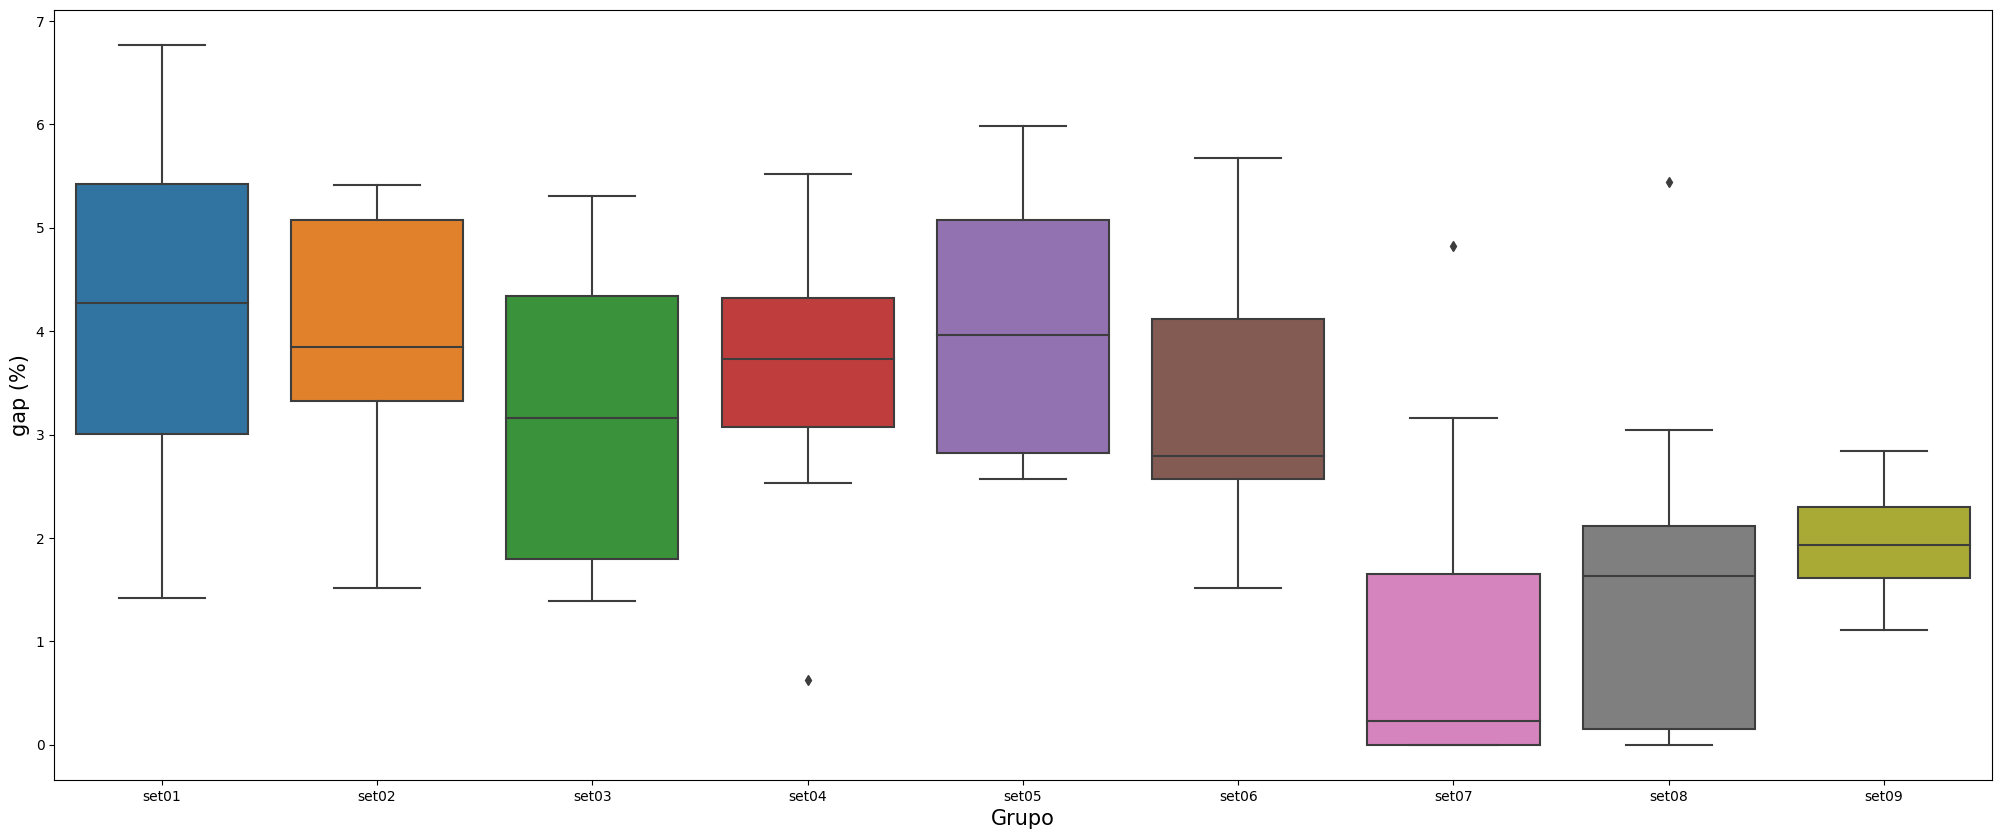

In [114]:
plt.figure(figsize=(25,10))
sns.boxplot(x=table['grupo'].astype('str'), y= table['gap_fop'], order= sorted(list(table['grupo'].unique().astype('str'))))
plt.ylabel("gap (%)", fontsize = 15)
plt.xlabel("Grupo", fontsize = 15)

In [115]:
form_ = "STD"

file=f"C:/Users/mateu/Downloads/Mestrado-main/Mestrado-main/CLSP_PY/MODELO_STD/MODELO_STD_ORIGINAL/RESULTADOS/clsr_{form_}_{mip_}.txt"

df1 = pd.DataFrame()
df1 = pd.read_csv(file,header=None,sep=';')

table1 = pd.DataFrame()
table1 = pd.concat([table1, df1], ignore_index=True)
table1.columns = ['instance','lb','ub','gap','time','nodes','opt']


rf_opt_std = table
rf_opt_std

,instance,rf,trf,opt,topt,time,FO_MIP,Time_MIP,Resolvida,gap_rf,gap_fop,grupo
0,c52_1.txt,9796.8,4.276,9776.4,2.764,7.040,9332.928,3600.002,0,4.970273,4.751692,set01
1,c52_2.txt,10204.6,5.610,10159.2,3.312,8.922,9515.082,3600.002,0,7.246580,6.769442,set01
2,c52_3.txt,9413.8,3.908,9381.8,2.625,6.533,9164.475,3600.002,0,2.720560,2.371385,set01
3,c52_4.txt,10400.2,5.415,10381.4,3.638,9.053,9814.822,3600.001,0,5.964224,5.772677,set01
4,c52_5.txt,11243.5,4.512,11172.0,3.093,7.605,10700.737,3600.002,0,5.072202,4.404024,set01
...,...,...,...,...,...,...,...,...,...,...,...,...
103,c52_104.txt,72897.5,20.317,72897.5,4.135,24.452,71669.826,3600.002,0,1.712958,1.712958,set09
104,c52_105.txt,71415.8,14.641,71363.0,3.877,18.518,69838.528,3600.002,0,2.258455,2.182852,set09
105,c52_106.txt,84083.0,24.909,83903.2,5.707,30.616,81744.273,3600.050,0,2.861029,2.641074,set09
106,c52_107.txt,64242.8,11.855,64197.0,3.125,14.980,63020.941,3600.003,0,1.938814,1.866140,set09


In [119]:
table1['opt'].value_counts()

opt
1    80
0    28
Name: count, dtype: int64

In [116]:
rf_opt_std['Resolvida'].value_counts()

Resolvida
0    93
1    15
Name: count, dtype: int64

In [27]:
form_ = "STD"

file=f"C:/Users/mateu/Downloads/Mestrado-main/Mestrado-main/CLSP_PY/MODELO_{form_}/MODELO_{form_}_RF_OPT/RESULTADOS/clsr_{form_}_relax_and_opt_table.txt"

df = pd.DataFrame()
df = pd.read_csv(file,header=None,sep=';')

table = pd.DataFrame()
table = pd.concat([table, df], ignore_index=True)
table.columns = ['instance','rf','trf','opt','topt','time']


rf_opt_std = table
rf_opt_std


,instance,rf,trf,opt,topt,time
0,c52_1.txt,9883.2,0.456,9883.2,0.346,0.801
1,c52_2.txt,10235.8,0.539,10181.0,0.434,0.972
2,c52_3.txt,9442.8,0.485,9404.6,0.301,0.786
3,c52_4.txt,10451.2,0.558,10418.6,0.403,0.961
4,c52_5.txt,11201.0,0.580,11164.5,0.383,0.963
...,...,...,...,...,...,...
103,c52_104.txt,81737.0,0.456,78664.0,0.332,0.788
104,c52_105.txt,76685.8,0.300,74869.0,0.268,0.569
105,c52_106.txt,90922.6,0.299,86501.6,0.223,0.522
106,c52_107.txt,67157.2,0.263,64972.4,0.200,0.463


In [28]:
set_ = 'set01'

tab = pd.DataFrame()
for i in range(1,13):
    t = rf_opt_std.loc[rf_opt_std['instance'] == f'c52_{i}.txt']
    tab = pd.concat([tab,t])

tab = pd.DataFrame({
    'instance':f'{set_}',
    'rf':tab['rf'].mean(),
    'trf':tab['trf'].mean(),
    'opt':tab['opt'].mean(),
    'topt':tab['topt'].mean(),
    'time':tab['time'].mean(),
    },index=[f'{form_}']
)

set01_rf_opt_std = tab
set01_rf_opt_std

,instance,rf,trf,opt,topt,time
STD,set01,10748.35,0.530417,10712.275,0.380833,0.911167


In [29]:
set_ = 'set02'

tab = pd.DataFrame()
for i in range(13,25):
    t = rf_opt_std.loc[rf_opt_std['instance'] == f'c52_{i}.txt']
    tab = pd.concat([tab,t])

tab = pd.DataFrame({
    'instance':f'{set_}',
    'rf':tab['rf'].mean(),
    'trf':tab['trf'].mean(),
    'opt':tab['opt'].mean(),
    'topt':tab['topt'].mean(),
    'time':tab['time'].mean(),
    },index=[f'{form_}']
)

set02_rf_opt_std = tab
set02_rf_opt_std

,instance,rf,trf,opt,topt,time
STD,set02,17384.5,0.572583,17327.008333,0.382583,0.95525


In [30]:
set_ = 'set03'

tab = pd.DataFrame()
for i in range(25,37):
    t = rf_opt_std.loc[rf_opt_std['instance'] == f'c52_{i}.txt']
    tab = pd.concat([tab,t])

tab = pd.DataFrame({
    'instance':f'{set_}',
    'rf':tab['rf'].mean(),
    'trf':tab['trf'].mean(),
    'opt':tab['opt'].mean(),
    'topt':tab['topt'].mean(),
    'time':tab['time'].mean(),
    },index=[f'{form_}']
)

set03_rf_opt_std = tab
set03_rf_opt_std

,instance,rf,trf,opt,topt,time
STD,set03,48396.575,0.55625,48316.116667,0.364833,0.921


In [31]:
set_ = 'set04'

tab = pd.DataFrame()
for i in range(37,49):
    t = rf_opt_std.loc[rf_opt_std['instance'] == f'c52_{i}.txt']
    tab = pd.concat([tab,t])

tab = pd.DataFrame({
    'instance':f'{set_}',
    'rf':tab['rf'].mean(),
    'trf':tab['trf'].mean(),
    'opt':tab['opt'].mean(),
    'topt':tab['topt'].mean(),
    'time':tab['time'].mean(),
    },index=[f'{form_}']
)

set04_rf_opt_std = tab
set04_rf_opt_std

,instance,rf,trf,opt,topt,time
STD,set04,15608.541667,0.37025,15053.383333,0.28675,0.65675


In [32]:
set_ = 'set05'

tab = pd.DataFrame()
for i in range(49,61):
    t = rf_opt_std.loc[rf_opt_std['instance'] == f'c52_{i}.txt']
    tab = pd.concat([tab,t])

tab = pd.DataFrame({
    'instance':f'{set_}',
    'rf':tab['rf'].mean(),
    'trf':tab['trf'].mean(),
    'opt':tab['opt'].mean(),
    'topt':tab['topt'].mean(),
    'time':tab['time'].mean(),
    },index=[f'{form_}']
)

set05_rf_opt_std = tab
set05_rf_opt_std

,instance,rf,trf,opt,topt,time
STD,set05,22737.25,0.419667,22322.841667,0.302,0.72175


In [33]:
set_ = 'set06'

tab = pd.DataFrame()
for i in range(61,73):
    t = rf_opt_std.loc[rf_opt_std['instance'] == f'c52_{i}.txt']
    tab = pd.concat([tab,t])

tab = pd.DataFrame({
    'instance':f'{set_}',
    'rf':tab['rf'].mean(),
    'trf':tab['trf'].mean(),
    'opt':tab['opt'].mean(),
    'topt':tab['topt'].mean(),
    'time':tab['time'].mean(),
    },index=[f'{form_}']
)

set06_rf_opt_std = tab
set06_rf_opt_std

,instance,rf,trf,opt,topt,time
STD,set06,53435.591667,0.414833,53111.9,0.285083,0.699917


In [34]:
set_ = 'set07'

tab = pd.DataFrame()
for i in range(73,85):
    t = rf_opt_std.loc[rf_opt_std['instance'] == f'c52_{i}.txt']
    tab = pd.concat([tab,t])

tab = pd.DataFrame({
    'instance':f'{set_}',
    'rf':tab['rf'].mean(),
    'trf':tab['trf'].mean(),
    'opt':tab['opt'].mean(),
    'topt':tab['topt'].mean(),
    'time':tab['time'].mean(),
    },index=[f'{form_}']
)

set07_rf_opt_std = tab
set07_rf_opt_std

,instance,rf,trf,opt,topt,time
STD,set07,32253.366667,0.227917,27976.775,0.210417,0.438417


In [35]:
set_ = 'set08'

tab = pd.DataFrame()
for i in range(85,97):
    t = rf_opt_std.loc[rf_opt_std['instance'] == f'c52_{i}.txt']
    tab = pd.concat([tab,t])

tab = pd.DataFrame({
    'instance':f'{set_}',
    'rf':tab['rf'].mean(),
    'trf':tab['trf'].mean(),
    'opt':tab['opt'].mean(),
    'topt':tab['topt'].mean(),
    'time':tab['time'].mean(),
    },index=[f'{form_}']
)

set08_rf_opt_std = tab
set08_rf_opt_std

,instance,rf,trf,opt,topt,time
STD,set08,41857.8,0.246167,37574.291667,0.194083,0.440083


In [36]:
set_ = 'set09'

tab = pd.DataFrame()
for i in range(97,108):
    t = rf_opt_std.loc[rf_opt_std['instance'] == f'c52_{i}.txt']
    tab = pd.concat([tab,t])

tab = pd.DataFrame({
    'instance':f'{set_}',
    'rf':tab['rf'].mean(),
    'trf':tab['trf'].mean(),
    'opt':tab['opt'].mean(),
    'topt':tab['topt'].mean(),
    'time':tab['time'].mean(),
    },index=[f'{form_}']
)

set09_rf_opt_std = tab
set09_rf_opt_std

,instance,rf,trf,opt,topt,time
STD,set09,80114.3,0.329,78116.327273,0.218636,0.548


In [37]:
res_rf_opt_std = pd.DataFrame()
res_rf_opt_std = pd.concat([res_rf_opt_std,set01_rf_opt_std], ignore_index= True)
res_rf_opt_std = pd.concat([res_rf_opt_std,set02_rf_opt_std], ignore_index= True)
res_rf_opt_std = pd.concat([res_rf_opt_std,set03_rf_opt_std], ignore_index= True)
res_rf_opt_std = pd.concat([res_rf_opt_std,set04_rf_opt_std], ignore_index= True)
res_rf_opt_std = pd.concat([res_rf_opt_std,set05_rf_opt_std], ignore_index= True)
res_rf_opt_std = pd.concat([res_rf_opt_std,set06_rf_opt_std], ignore_index= True)
res_rf_opt_std = pd.concat([res_rf_opt_std,set07_rf_opt_std], ignore_index= True)
res_rf_opt_std = pd.concat([res_rf_opt_std,set08_rf_opt_std], ignore_index= True)
res_rf_opt_std = pd.concat([res_rf_opt_std,set09_rf_opt_std], ignore_index= True)
res_rf_opt_std

,instance,rf,trf,opt,topt,time
0,set01,10748.350000,0.530417,10712.275000,0.380833,0.911167
1,set02,17384.500000,0.572583,17327.008333,0.382583,0.955250
2,set03,48396.575000,0.556250,48316.116667,0.364833,0.921000
3,set04,15608.541667,0.370250,15053.383333,0.286750,0.656750
4,set05,22737.250000,0.419667,22322.841667,0.302000,0.721750
5,set06,53435.591667,0.414833,53111.900000,0.285083,0.699917
6,set07,32253.366667,0.227917,27976.775000,0.210417,0.438417
7,set08,41857.800000,0.246167,37574.291667,0.194083,0.440083
8,set09,80114.300000,0.329000,78116.327273,0.218636,0.548000


In [38]:
tab = pd.DataFrame({
    'instance':f'res_rf_opt_std',
    'rf':res_rf_opt_std['rf'].mean(),
    'trf':res_rf_opt_std['trf'].mean(),
    'opt':res_rf_opt_std['opt'].mean(),
    'topt':res_rf_opt_std['topt'].mean(),
    'time':res_rf_opt_std['time'].mean(),
    },index=[f'res_rf_opt_std']
)

res_rf_opt_std = pd.concat([res_rf_opt_std, tab], ignore_index=True)
res_rf_opt_std

print(res_rf_opt_std[['instance','rf','trf','opt','topt','time']].to_latex(index=False,float_format="%.2f"))

\begin{tabular}{lrrrrr}
\toprule
instance & rf & trf & opt & topt & time \\
\midrule
set01 & 10748.35 & 0.53 & 10712.27 & 0.38 & 0.91 \\
set02 & 17384.50 & 0.57 & 17327.01 & 0.38 & 0.96 \\
set03 & 48396.58 & 0.56 & 48316.12 & 0.36 & 0.92 \\
set04 & 15608.54 & 0.37 & 15053.38 & 0.29 & 0.66 \\
set05 & 22737.25 & 0.42 & 22322.84 & 0.30 & 0.72 \\
set06 & 53435.59 & 0.41 & 53111.90 & 0.29 & 0.70 \\
set07 & 32253.37 & 0.23 & 27976.77 & 0.21 & 0.44 \\
set08 & 41857.80 & 0.25 & 37574.29 & 0.19 & 0.44 \\
set09 & 80114.30 & 0.33 & 78116.33 & 0.22 & 0.55 \\
res_rf_opt_std & 35837.36 & 0.41 & 34501.21 & 0.29 & 0.70 \\
\bottomrule
\end{tabular}

